In [233]:
from nltk import sentiment
from nltk import *
import string
import matplotlib.pyplot as plt
import numpy

In [156]:
def get_text(file_name):
    file = open(file_name, encoding = "ISO-8859-1")
    text = file.read()
    file.close()
    return text

In [12]:
def get_sentences(text):
    sentences = sent_tokenize(text)
    sentences = [sentence.replace('\n', ' ').replace('\r', '') for sentence in sentences]
    return sentences

In [89]:
def get_words(text):
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens]
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    words = [word for word in stripped if word.isalpha()]
    stop_words = set(corpus.stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
#     porter = stem.porter.PorterStemmer()
#     words = [porter.stem(word) for word in words]
    return words

In [243]:
def get_sentences_containing_my_words(sentences, words_list):
    my_sentence = []
    for sentence in sentences:
        if any(word in sentence for word in words_list):
            my_sentence.append(sentence)
    return my_sentence

In [177]:
def get_polarity_count(sentences, pos_threshold = 0, neg_threshold = 0):
    polarity_count = {"positive":0,"negative":0,"neutral":0}
    sid = sentiment.SentimentIntensityAnalyzer()
    for sentence in sentences:
        ss = sid.polarity_scores(sentence)
        if ss["compound"] == 0.0:
            polarity_count["neutral"] +=1
        elif ss["compound"] > pos_threshold:
            polarity_count["positive"] +=1
        elif ss["compound"] < neg_threshold:
            polarity_count["negative"] +=1
    return polarity_count

In [154]:
file_name1 = "got1.txt"
file_name2 = "got2.txt"
file_name3 = "got3.txt"
file_name4 = "got4.txt"

In [158]:
text1 = get_text(file_name1)
sentences1 = get_sentences(text1)

text2 = get_text(file_name2)
sentences2 = get_sentences(text2)

text3 = get_text(file_name3)
sentences3 = get_sentences(text3)

text4 = get_text(file_name4)
sentences4 = get_sentences(text4)

In [178]:
polarity_count1 = get_polarity_count(sentences1)
print("Polarity Count for Book 1: ", polarity_count1)

polarity_count2 = get_polarity_count(sentences2)
print("Polarity Count for Book 2: ", polarity_count2)

polarity_count3 = get_polarity_count(sentences3)
print("Polarity Count for Book 3: ", polarity_count3)

polarity_count4 = get_polarity_count(sentences4)
print("Polarity Count for Book 4: ", polarity_count4)

Polarity Count for Book 1:  {'positive': 6297, 'negative': 6451, 'neutral': 14494}
Polarity Count for Book 2:  {'positive': 6928, 'negative': 6947, 'neutral': 16017}
Polarity Count for Book 3:  {'positive': 9024, 'negative': 9398, 'neutral': 19182}
Polarity Count for Book 4:  {'positive': 6081, 'negative': 5822, 'neutral': 8840}


In [160]:
t1 = Text(get_words(text1))
t2 = Text(get_words(text2))
t3 = Text(get_words(text3))
t4 = Text(get_words(text4))

In [172]:
print("Similar words in Book 1: ")
t1.similar("jon")
print()
print("Similar words in Book 2: ")
t2.similar("jon")
print()
print("Similar words in Book 3: ")
t3.similar("jon")
print()
print("Similar words in Book 4: ")
t4.similar("jon")

Similar words in Book 1: 
catelyn robb tyrion bran robert ned arya brother snow sansa dany
littlefinger varys lord father never way maester gods know

Similar words in Book 2: 
tyrion lord stannis arya one know renly bran balon varys catelyn theon
like never man softly hand dead say lommy

Similar words in Book 3: 
davos sam sansa tyrion arya lord father jaime bran would well never
know though catelyn grace dany eyes might king

Similar words in Book 4: 
daughters arms could oldtown would went lord balon certain longer
others tywin aeron council pleaded jaime robert frey tarly wights


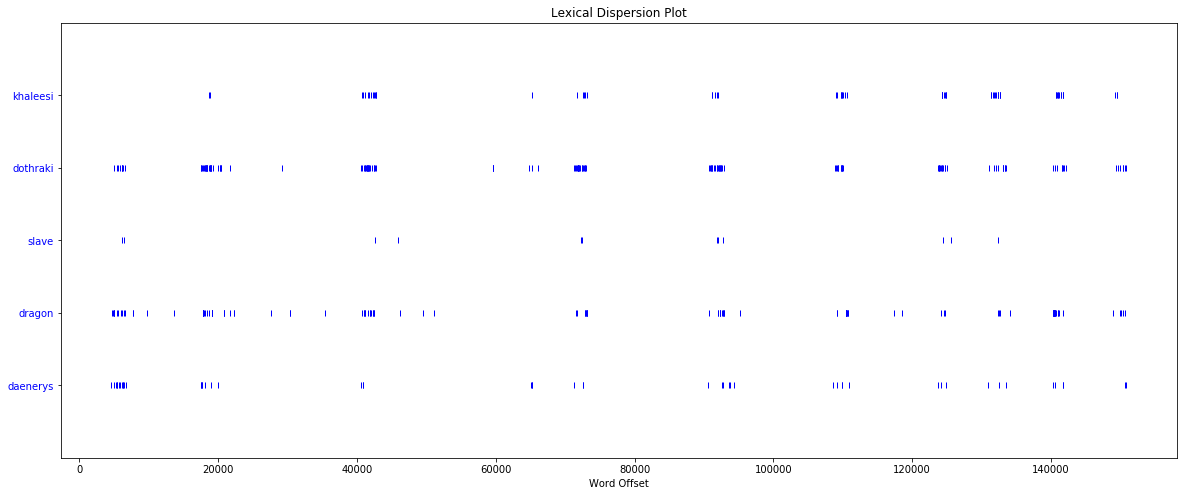

In [165]:
plt.figure(figsize=(20, 8))
t1.dispersion_plot(["khaleesi", "dothraki", "slave", "dragon", "daenerys"])

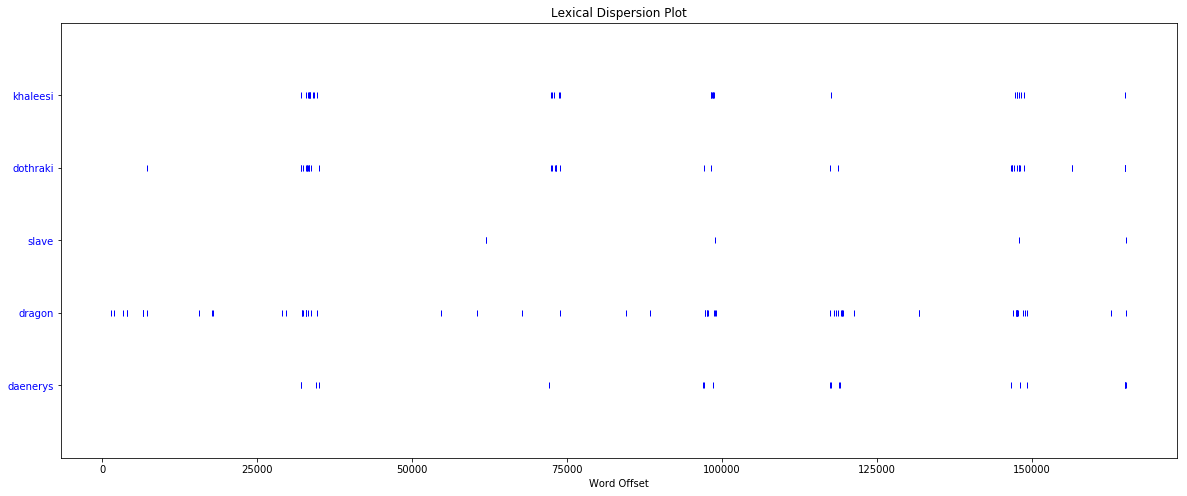

In [166]:
plt.figure(figsize=(20, 8))
t2.dispersion_plot(["khaleesi", "dothraki", "slave", "dragon", "daenerys"])

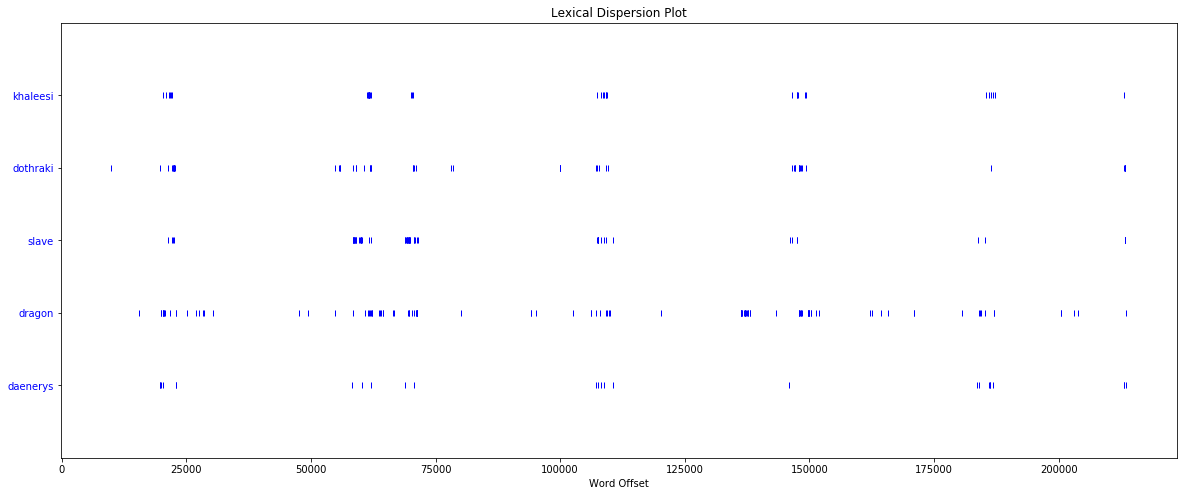

In [167]:
plt.figure(figsize=(20, 8))
t3.dispersion_plot(["khaleesi", "dothraki", "slave", "dragon", "daenerys"])

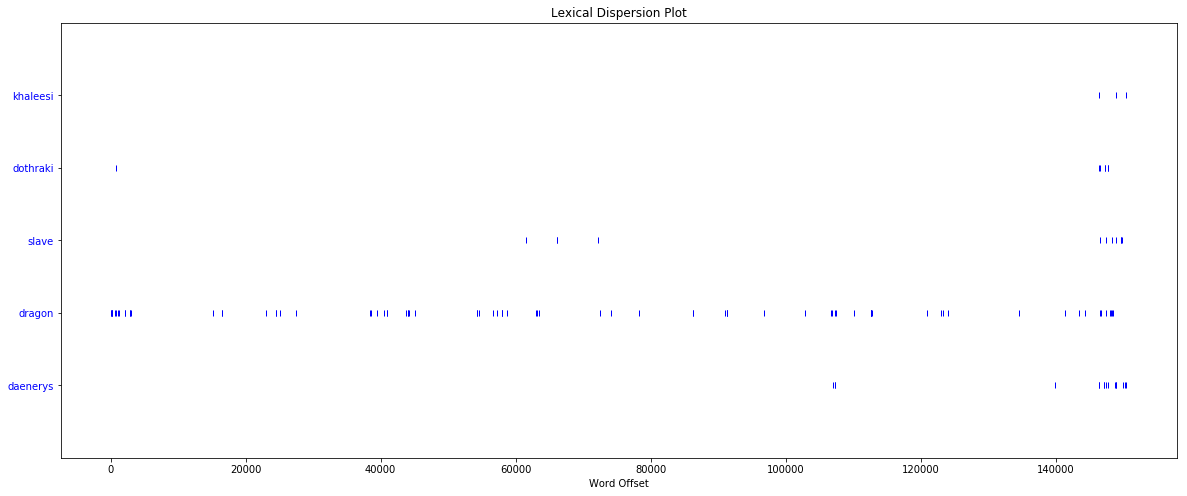

In [164]:
plt.figure(figsize=(20, 8))
t4.dispersion_plot(["khaleesi", "dothraki", "slave", "dragon", "daenerys"])

In [244]:
my_list = ["Khaleesi", "Dothraki", "Daenerys"]
s1 = get_sentences_containing_my_words(sentences1, my_list)
s2 = get_sentences_containing_my_words(sentences2, my_list)
s3 = get_sentences_containing_my_words(sentences3, my_list)
s4 = get_sentences_containing_my_words(sentences4, my_list)
print("Polarity Count for Book 1: ", get_polarity_count(s1))
print("Polarity Count for Book 2: ", get_polarity_count(s2))
print("Polarity Count for Book 3: ", get_polarity_count(s3))
print("Polarity Count for Book 4: ", get_polarity_count(s4))

Polarity Count for Book 1:  {'positive': 75, 'negative': 57, 'neutral': 100}
Polarity Count for Book 2:  {'positive': 17, 'negative': 21, 'neutral': 34}
Polarity Count for Book 3:  {'positive': 32, 'negative': 25, 'neutral': 44}
Polarity Count for Book 4:  {'positive': 10, 'negative': 6, 'neutral': 6}


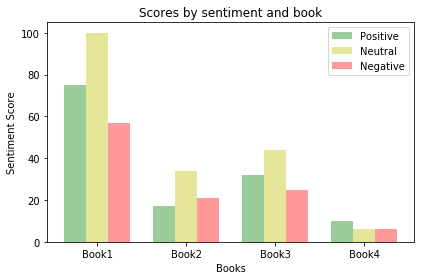

In [245]:
n_groups = 4

polarity_count1 = get_polarity_count(s1)
polarity_count2 = get_polarity_count(s2)
polarity_count3 = get_polarity_count(s3)
polarity_count4 = get_polarity_count(s4)

positive = (polarity_count1['positive'], polarity_count2['positive'], polarity_count3['positive'], polarity_count4['positive'])

neutral = (polarity_count1['neutral'], polarity_count2['neutral'], polarity_count3['neutral'], polarity_count4['neutral'])

negative = (polarity_count1['negative'], polarity_count2['negative'], polarity_count3['negative'], polarity_count4['negative'])

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.25

opacity = 0.4


rects1 = ax.bar(index - bar_width, positive, bar_width,
                alpha=opacity, color='g', label='Positive')

rects2 = ax.bar(index, neutral, bar_width,
                alpha=opacity, color='y', label='Neutral')

rects3 = ax.bar(index + bar_width, negative, bar_width,
                alpha=opacity, color='r', label='Negative')

ax.set_xlabel('Books')
ax.set_ylabel('Sentiment Score')
ax.set_title('Scores by sentiment and book')
ax.set_xticks(index)
ax.set_xticklabels(('Book1', 'Book2', 'Book3', 'Book4'))
ax.legend()

fig.tight_layout()
plt.show()